In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

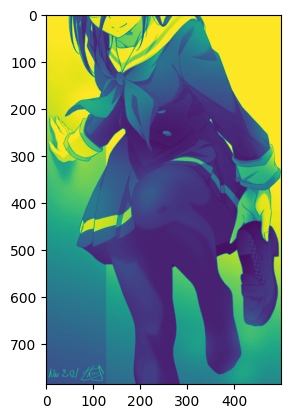

In [5]:
image = cv2.imread("../images/94147214_p0.png", flags=0)
plt.imshow(image)

# 角点

角点是图像很重要的特征，对图像图形的理解和分析有很重要的作用，在保留图像图形重要特征的同时，
可以有效减少信息的数据量，使信息的含量很高，有效提高计算速度，有利于图像的可靠匹配，
使得实时处理成为可能。在物体识别、图像匹配、视觉跟踪和三维重建等方面有很重要的应用。
角点可以认为是窗口向任意方向的移动都导致图像灰度的明显变化。从图像分析的角度来定义角点可以有一下两种：
    1.角点可以是两个边缘的角点
    2.角点是邻域内具有两个主方向的特征点

---

前者往往需要对图像边缘进行编码，这在很大程度上依赖于图像的分割与边缘提取，具有相当大的难度和计算量，
且一旦待检测目标局部发生变化，很可能导致操作的失败。
角点检测算法可以归纳为三类：基于灰度图像的角点检测、基于二值图像的角点检测、基于轮廓曲线的角点检测。
基于灰度图像的检测又可细分为基于梯度、基于模板、基于模板梯度组合三类方法，其中基于模板的方法主要
考虑像素邻域点的灰度变化，即图像亮度的变化，将与邻点亮度对比足够大的点定义为角点。常见的基于模板的
角点检测算法有Kitchen-Rosenfeld角点检测,Harris角点检测算法，KLT角点检测和SUSAN角点检测。本文主要介绍Harris角点检测。

---

Harris角点检测原理

Harris角点检测是一种直接基于灰度图像的角点提取算法，稳定性高，尤其对L型角点检测精度高。
各个方向上移动这个特征的小窗口，窗口内区域的灰度发生了较大的变化，那么久认为在窗口内遇到了角点，
如果这个特定的窗口在图像各个方向上移动时，窗口内图像的灰度发生了很大变化，而在另一些方向上没有
发生变化，那么窗口内的图像可能就是一条直线的线段。

In [12]:
corner = cv2.cornerHarris(
    src=image,      # 必须单通道
    blockSize=2,    # 邻域大小，可以查看cornerEigenValsAndVecs()得到更多关于blockSize的信息
    ksize=3,        # 表示Sobel()算子孔径大小
    k=0.04,         # Harris参数，用于判断是否为角点
)
print(corner.shape, corner.min(), corner.max())

(787, 500) -0.015195892 0.030256689


In [13]:
corner_normalize = cv2.normalize(
    src=corner,
    dst=None,
    alpha=0,
    beta=255,
    norm_type=cv2.NORM_MINMAX,
    dtype=cv2.CV_8UC1,
)

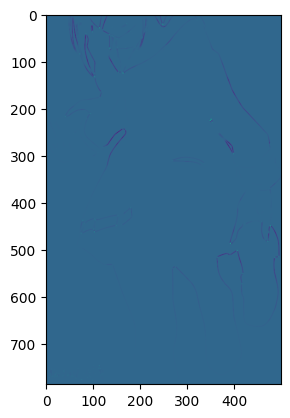

In [16]:
plt.imshow(corner_normalize)

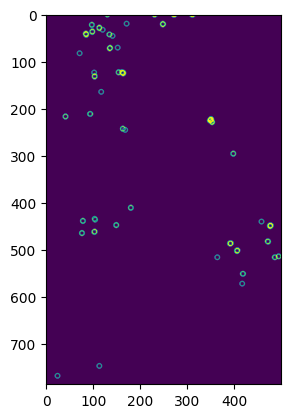

In [18]:
black = np.zeros(image.shape, dtype=np.uint8)
for x in range(image.shape[1]):
    for y in range(image.shape[0]):
        if corner_normalize[y, x] > 100:  # 只显示值大于100的
            cv2.circle(
                img=black,
                center=[x, y],
                radius=5,
                color=255,
                thickness=1,
                lineType=cv2.LINE_AA
            )

            cv2.circle(
                img=image,
                center=[x, y],
                radius=5,
                color=255,
                thickness=1,
                lineType=cv2.LINE_AA
            )
plt.imshow(black)

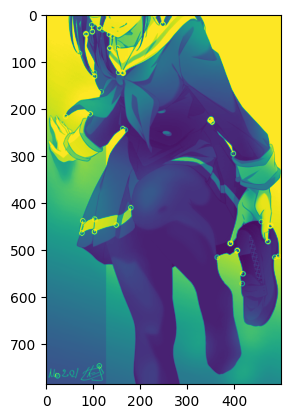

In [19]:
plt.imshow(image)